#A credit card is a small thin plastic or fiber card that incorporates information about the person such as a picture or signature and the person named on it to charge purchases and services to his linked account charges which will be debited regularly.  
#Nowadays, card data is read by ATMs, swiping machines, store readers, banks, and online transactions. 
#Each card has a unique card number which is very important, its security mainly relies on the physical security of the card and also the privacy of the credit card number. 
#There is a rapid growth in credit card transactions which has led to substantial growth in scam cases. 
#Credit card fraud is expanding heavily because fraud financial loss is increasing drastically. 
#Multiple data mining and statistical techniques are used to catch fraud. 
#Therefore the detection of fraud using efficient and secured methods are very important.


Tasks To Be Performed:
1. Load the dataset using the pandas module.
2. Perform missing value analysis on the dataset.
3. From the dataset, calculate the number of genuine transactions, number of
fraud transactions and the percentage of fraud transactions.
4. Using the visualization module, visualize the genuine and fraudulent
transactions using a bar graph.
5. Using the Standard Scaler module, normalize the amount column and
store the new values in the NormalizedAmount column.
6. Split the dataset in train and test set and have a 70:30 split ratio for the
model.
7. Now use a decision tree and random forest model for training on top of the
train set.
8. Compare the predictions of both models using predict().
9. Compare the accuracy of both models using score().
10. Check the performance matrix of both models and compare which
model is having the highest performance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [3]:
dataset = pd.read_csv("C:\\Users\\Alva Melita\\Downloads\\creditcard_csv.csv")

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [5]:
dataset.shape

(284807, 31)

In [6]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
missing_values = dataset.isnull().sum()

In [ ]:
num_genuine = dataset[dataset['Class'] == 0].shape[0]
num_fraud = dataset[dataset['Class'] == 1].shape[0]


In [ ]:
total_transactions = num_genuine + num_fraud
if total_transactions > 0:
    fraud_percentage = (num_fraud / total_transactions) * 100
else:
    fraud_percentage = 0.0

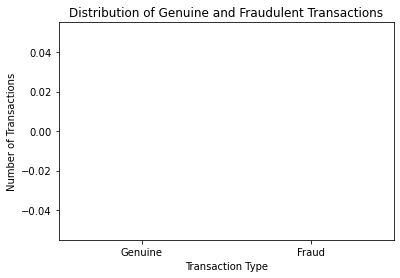

In [20]:
plt.bar(['Genuine', 'Fraud'], [num_genuine, num_fraud])
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Genuine and Fraudulent Transactions')
plt.show()

In [ ]:
scaler = StandardScaler()
dataset['NormalizedAmount'] = scaler.fit_transform(dataset['Amount'].values.reshape(-1, 1))

In [ ]:
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

In [ ]:
dt_predictions = decision_tree_model.predict(X_test)
rf_predictions = random_forest_model.predict(X_test)

In [ ]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [16]:
dt_confusion = confusion_matrix(y_test, dt_predictions)
rf_confusion = confusion_matrix(y_test, rf_predictions)

dt_classification_report = classification_report(y_test, dt_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)



In [17]:
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)




Decision Tree Accuracy: 0.9991105181231933
Random Forest Accuracy: 0.9995786664794073


In [18]:
print("Decision Tree Confusion Matrix:\n", dt_confusion)
print("Random Forest Confusion Matrix:\n", rf_confusion)


Decision Tree Confusion Matrix:
 [[85259    48]
 [   28   108]]
Random Forest Confusion Matrix:
 [[85301     6]
 [   30   106]]


In [19]:
print("Decision Tree Classification Report:\n", dt_classification_report)
print("Random Forest Classification Report:\n", rf_classification_report)


Decision Tree Classification Report:
               precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     85307
         '1'       0.69      0.79      0.74       136

    accuracy                           1.00     85443
   macro avg       0.85      0.90      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Random Forest Classification Report:
               precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     85307
         '1'       0.95      0.78      0.85       136

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

